In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models
from scipy import optimize
from Pymod import prep
from plotter import semlog
%matplotlib inline
%load_ext autoreload

In [2]:
WT_08_lbl, WT_08_rtot, WT_08_lig, WT_08_sat = prep.datprep('Data/EGFR_WT_08_Sat.csv','Data/EGFR_WT_08_Rtot.csv')

hootie hoo! the indices match!


In [17]:
k11r = np.clip(np.random.normal(4.6,0.6,10000),0.0001,np.inf)
k21r = np.clip(np.random.normal(5.3,0.4,10000),0.0001,np.inf)
k22r = np.clip(np.random.normal(0.34,0.11,10000),0.0001,np.inf)
l20r = np.clip(np.random.normal(530.,220.,10000),0.0001,np.inf)

In [18]:
parmset = np.stack([k11r,k21r,k22r,l20r],1)

In [14]:
parmset[89]

array([  4.25034272e+00,   5.64562215e+00,   2.46046607e-01,
         6.48929362e+02])

In [15]:
rtot_guess = np.array([0.001,0.002,0.003,0.005,0.01,0.03])

In [25]:
bounds1 = tuple(0.0 for i in range(6)),tuple(1.0 for i in range(6))

In [27]:
res = [optimize.least_squares(models.wym_rtot_sp,rtot_guess,bounds=bounds1,args=(WT_08_lig,WT_08_sat,i)).x for i in parmset]

In [28]:
resar = np.array(res)

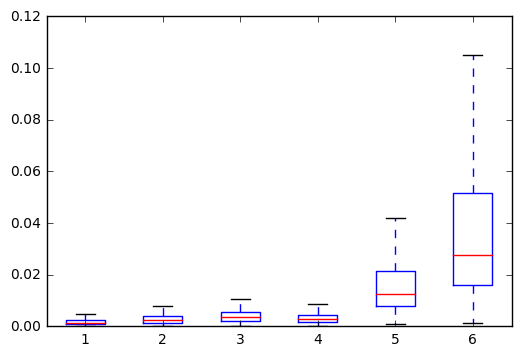

In [68]:
a = plt.boxplot(resar, showfliers=False, meanline=True)

In [32]:
resar.mean(axis=0)

array([ 0.01102358,  0.01257138,  0.01412905,  0.01304125,  0.02935691,
        0.06209491])

In [33]:
resar.std(axis=0)

array([ 0.0929018 ,  0.09317995,  0.09356491,  0.09327642,  0.10167781,
        0.13635163])

In [34]:
WT_08_lbl

['24k', '43k', '92k', '120k', '231k', '447k']

In [35]:
nominal = np.array([24,43,92,120,231,447])

In [37]:
estimated = np.array([
4.98E-04,
8.93E-04,
1.91E-03,
2.49E-03,
4.80E-03,
9.28E-03])

In [38]:
estimated

array([ 0.000498,  0.000893,  0.00191 ,  0.00249 ,  0.0048  ,  0.00928 ])

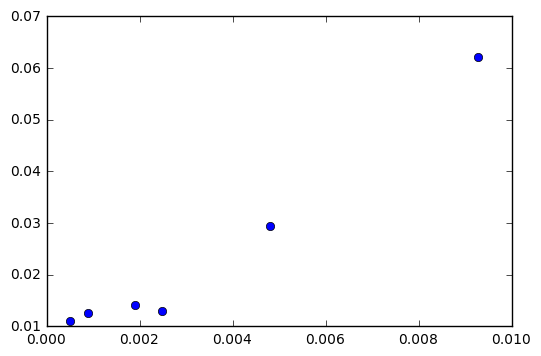

In [41]:
plt.plot(estimated,resar.mean(axis=0),'o')

In [42]:
resar[0]

array([ 0.00164098,  0.00294243,  0.00388377,  0.00319572,  0.01461451,
        0.03153278])

In [43]:
type(resar)

numpy.ndarray

In [44]:
resar.shape

(10000, 6)

In [46]:
resar[:,1]

array([ 0.00294243,  0.00966384,  0.00035985, ...,  0.0029051 ,
        0.00187972,  0.00317272])

In [50]:
np.percentile(resar,99.3,axis=0)

array([ 0.99992855,  0.99995781,  0.99998101,  0.99997411,  0.99999491,
        0.99999672])

In [61]:
b = a['fliers'][0]

In [63]:
type(b)

matplotlib.lines.Line2D

In [75]:
rt444 = resar[:,5]

In [76]:
rt444.mean()

0.062094909884369887

In [77]:
q75 = np.percentile(rt444,q=75)

In [78]:
q25 = np.percentile(rt444,q=25)

In [79]:
q75-q25

0.035574062298400357

In [80]:
np.median(rt444)

0.027568002183503075

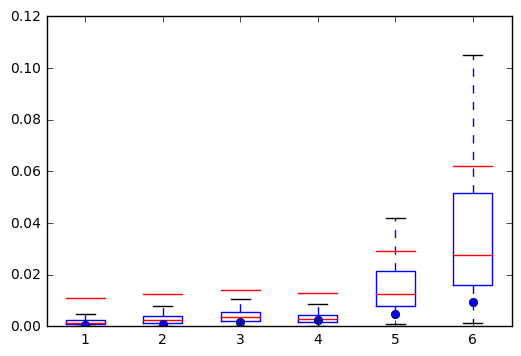

In [98]:
plt.boxplot(resar, showfliers=False, showmeans=True, meanline=True)
plt.plot([1,2,3,4,5,6],estimated,'o')

In [82]:
estimated

array([ 0.000498,  0.000893,  0.00191 ,  0.00249 ,  0.0048  ,  0.00928 ])

In [83]:
litparms = np.array([4.6,5.3,0.34,530.])

In [85]:
res2 = optimize.least_squares(models.wym_rtot_sp,rtot_guess,bounds=bounds1,args=(WT_08_lig,WT_08_sat,litparms))

In [86]:
res2.x

array([ 0.00143878,  0.00242227,  0.00339179,  0.0027181 ,  0.01216361,
        0.02594479])

In [89]:
resar.mean(axis=0)

array([ 0.01102358,  0.01257138,  0.01412905,  0.01304125,  0.02935691,
        0.06209491])

In [92]:
np.median(resar,axis=0)

array([ 0.00149652,  0.00250103,  0.00351105,  0.00281403,  0.01273932,
        0.027568  ])

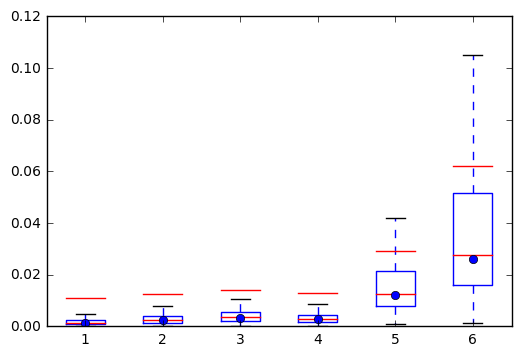

In [99]:
plt.boxplot(resar, showfliers=False, showmeans=True, meanline=True)
plt.plot([1,2,3,4,5,6],res2.x,'o')

In [100]:
np.median(resar,axis=0)

array([ 0.00149652,  0.00250103,  0.00351105,  0.00281403,  0.01273932,
        0.027568  ])

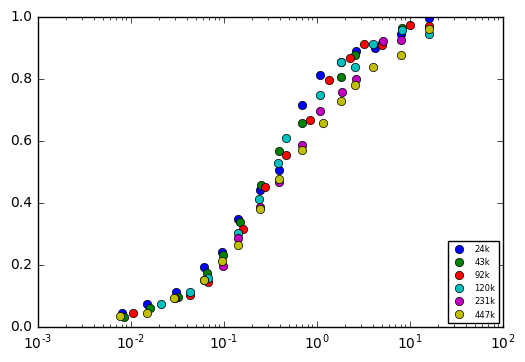

In [3]:
semlog(WT_08_lig,WT_08_sat,WT_08_lbl)